# Classificando cães e gatos

In [1]:
# Bibliotecas essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import cv2

# Para Deep Learning
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

# Para validação do modelo
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# montando o caminho das imagens
caminho_pasta = "imagens"
pasta_imagens = Path(caminho_pasta)

In [3]:
# criando uma lista com as imagens do diretório
filepaths = list(pasta_imagens.glob(r'**/*.jpg'))
filepaths

[PosixPath('imagens/gatinho/cat.6.jpg'),
 PosixPath('imagens/gatinho/cat.588.jpg'),
 PosixPath('imagens/gatinho/cat.239.jpg'),
 PosixPath('imagens/gatinho/cat.577.jpg'),
 PosixPath('imagens/gatinho/cat.211.jpg'),
 PosixPath('imagens/gatinho/cat.205.jpg'),
 PosixPath('imagens/gatinho/cat.12424.jpg'),
 PosixPath('imagens/gatinho/cat.12342.jpg'),
 PosixPath('imagens/gatinho/cat.12395.jpg'),
 PosixPath('imagens/gatinho/cat.359.jpg'),
 PosixPath('imagens/gatinho/cat.12381.jpg'),
 PosixPath('imagens/gatinho/cat.403.jpg'),
 PosixPath('imagens/gatinho/cat.365.jpg'),
 PosixPath('imagens/gatinho/cat.371.jpg'),
 PosixPath('imagens/gatinho/cat.417.jpg'),
 PosixPath('imagens/gatinho/cat.198.jpg'),
 PosixPath('imagens/gatinho/cat.30.jpg'),
 PosixPath('imagens/gatinho/cat.24.jpg'),
 PosixPath('imagens/gatinho/cat.167.jpg'),
 PosixPath('imagens/gatinho/cat.601.jpg'),
 PosixPath('imagens/gatinho/cat.18.jpg'),
 PosixPath('imagens/gatinho/cat.173.jpg'),
 PosixPath('imagens/gatinho/cat.614.jpg'),
 PosixPa

# Tratando os dados

In [4]:
# inicializando rótulos e listas de imagens para armazenar dados
labels = [] # lista vazia para armazenar a target
images = [] # lista vazia para armazenar imagens

image_size = 64 # definindo a dimensão da imagem

#loop 
for filepath in filepaths:
    # tratamento labels
    head = os.path.split(filepath) # extraindo o cabeçalho
    animal = os.path.split(head[0]) # extrai o nome do animal 
    labels.append(animal[1]) # adiciona o nome do animal na lista de labels
    # tratamento imagens
    img = cv2.imread(str(filepath)) # obtem a imagem
    img = cv2.resize(img, (image_size, image_size)).astype('float32') / 255.0 # padronização dos pixels
    images.append(img) # adiciona a imagem na lista de imagens

        
images = np.array(images) # converte a lista de imagens em lista de array
labels = np.array(labels) # converte as labels para lista de array

In [5]:
labels

array(['gatinho', 'gatinho', 'gatinho', ..., 'cachorinho', 'cachorinho',
       'cachorinho'], dtype='<U10')

In [6]:
images.shape # quantidade de imagens, tamanho da imagem x tam imagem, perfil de cores RGB

(1400, 64, 64, 3)

In [7]:
images

array([[[[0.7647059 , 0.7254902 , 0.8235294 ],
         [0.7607843 , 0.7176471 , 0.81960785],
         [0.7607843 , 0.7176471 , 0.81960785],
         ...,
         [0.6431373 , 0.65882355, 0.63529414],
         [0.8392157 , 0.79607844, 0.7411765 ],
         [0.7764706 , 0.7490196 , 0.7490196 ]],

        [[0.75686276, 0.72156864, 0.8039216 ],
         [0.7607843 , 0.7254902 , 0.80784315],
         [0.7607843 , 0.7254902 , 0.80784315],
         ...,
         [0.6509804 , 0.65882355, 0.6392157 ],
         [0.81960785, 0.78431374, 0.7137255 ],
         [0.72156864, 0.70980394, 0.7372549 ]],

        [[0.9372549 , 0.9254902 , 0.9372549 ],
         [0.9254902 , 0.9137255 , 0.9254902 ],
         [0.94509804, 0.93333334, 0.94509804],
         ...,
         [0.6509804 , 0.64705884, 0.6431373 ],
         [0.8117647 , 0.7921569 , 0.70980394],
         [0.60784316, 0.6156863 , 0.68235296]],

        ...,

        [[0.19215687, 0.14901961, 0.5137255 ],
         [0.1882353 , 0.14509805, 0.5058824 ]

# Construindo o Dataframe

In [8]:
# salvando a lista de caminhos
pd_filepaths = pd.Series(filepaths, name='Filepath').astype(str) 

# adicionando a label 
pd_labels = pd.Series(labels, name='Label')

#concatenando 
df = pd.concat([pd_filepaths, pd_labels], axis=1)

df.head()

,Filepath,Label
0,imagens/gatinho/cat.6.jpg,gatinho
1,imagens/gatinho/cat.588.jpg,gatinho
2,imagens/gatinho/cat.239.jpg,gatinho
3,imagens/gatinho/cat.577.jpg,gatinho
4,imagens/gatinho/cat.211.jpg,gatinho


In [9]:
df.tail()

,Filepath,Label
1395,imagens/cachorinho/dog.12348.jpg,cachorinho
1396,imagens/cachorinho/dog.12406.jpg,cachorinho
1397,imagens/cachorinho/dog.12360.jpg,cachorinho
1398,imagens/cachorinho/dog.12374.jpg,cachorinho
1399,imagens/cachorinho/dog.12412.jpg,cachorinho


In [10]:
# embaralhando o dataframe 
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Filepath,Label
0,imagens/gatinho/cat.550.jpg,gatinho
1,imagens/cachorinho/dog.12345.jpg,cachorinho
2,imagens/cachorinho/dog.519.jpg,cachorinho
3,imagens/gatinho/cat.191.jpg,gatinho
4,imagens/gatinho/cat.12377.jpg,gatinho


In [11]:
# cria uma cópia do dataframe com apenas um exemplar de cada espécie 
df_singles = df.copy().drop_duplicates(subset=('Label')).reset_index()

In [12]:
df_singles

,index,Filepath,Label
0,0,imagens/gatinho/cat.550.jpg,gatinho
1,1,imagens/cachorinho/dog.12345.jpg,cachorinho


In [13]:
# define o número de classes 
num_classes = df_singles.shape[0]

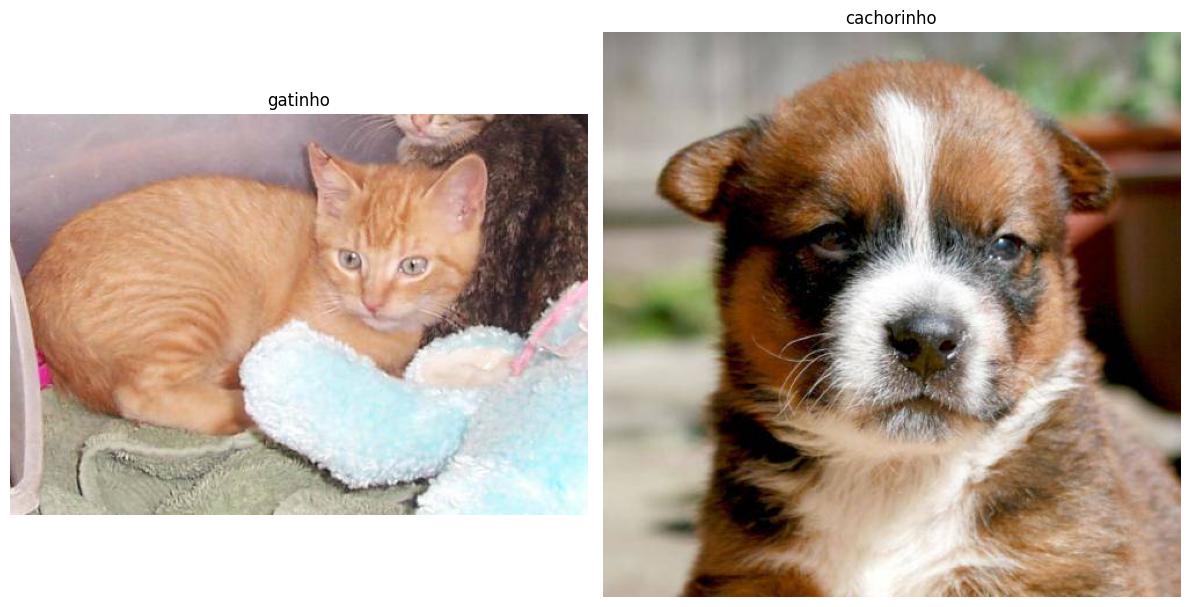

In [14]:
row = 1
column = 2

plt.figure(figsize=(12,9))

#loop 
for i in range(num_classes):
    image = df_singles.Filepath[i] # define uma variável de imagem local para i imagem no dataframe de singles
    plt.subplot(row, column, i+1) # define a posição da imagem a ser plotada
    plt.imshow(plt.imread(image))
    plt.title('{}'.format(df_singles.Label[i])) # adiciona o rótulo do bichinho que corresponde a imagem
    plt.axis('off')
    plt.tight_layout()
plt.show()

# Separando a base em treino e teste

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42)

In [19]:
# analisando a dimensão dos dados
print(f'Dimensão X_train: {X_train.shape}\nDimensão X_test: {X_test.shape}')

Dimensão X_train: (1120, 64, 64, 3)
Dimensão X_test: (280, 64, 64, 3)


In [20]:
# achatando os dados de treino e teste 
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

In [22]:
# visualizando a transformação dos dados
print(f'Representação Unidimensional X_train: {X_train_flat.shape}\nRepresentação Unidimensional X_test: {X_test_flat.shape}')

Representação Unidimensional X_train: (1120, 12288)
Representação Unidimensional X_test: (280, 12288)


In [23]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

In [28]:
y_train_tf

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

# Criando o modelo

In [30]:
from distutils.file_util import copy_file

checkpointer = ModelCheckpoint(filepath="weights.best.hdf5.keras", verbose=0, save_best_only=True)

In [31]:
input_shape = (image_size, image_size, 3) # shape de entrada das imagens passadas pelo modelo
learning_rate = 0.001 # taxa de aprendizado
weight_decay = 1e-4 # queda de peso 

In [32]:
# REDE NEURAL CONVOLUCIONAL

tf.random.set_seed(42)

model = Sequential() # abrindo a sequencia do modelo 

model.add(Conv2D(128, # camada convolucional com 128 neurônios
                 kernel_size=(3,3), #filtro utilizando uma matriz 3x3
                 strides=(2,2), #sendo movimentado por um stride de 2
                 padding='same', # padding ativado (sem bordas de zeros)
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001), #regularização L2 ativada
                 input_shape=input_shape
                 ))

# camada de MaxPolling ativada, com uma matriz 2x2 
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))

# regularização de dropout ativada
model.add(Dropout(0.5))

model.add(Conv2D(92, # 2 camada convolucional com 92 neurônios
                 kernel_size=(3,3),
                 strides=(2,2),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001)
                 ))

# camada de MaxPolling ativada, com uma matriz 2x2 
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))

# regularização de dropout ativada
model.add(Dropout(0.5))

# camada que achada os dados da imagem 
model.add(Flatten())

# camada Dense da rede neural convolucional + função de ativação relu
model.add(Dense(256, activation='relu'))

# camada de saída de rede, utilizando a função de ativação softmax para criar a probabilidade de pertencimento das classes
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

/Users/giuliana/Desktop/GitHub/fiap-deeplearning/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# monitor para interromper o modelo antecipadamente quando a melhoria da perda de validação for mínima
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, verbose=1, mode='auto')

#compila o modelo e aplicação a função de custo Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics = ['accuracy'])

model.save('./cat_dog.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 92)       │       106,076 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 92)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 92)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       377,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 487,262 (1.86 MB)

 Trainable params: 487,262 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# treinando o modelo

history = model.fit(X_train, y_train_tf, validation_split=0.25, 
                    callbacks=[monitor, checkpointer], verbose=1,
                    epochs=45, batch_size=50, shuffle=True)

Epoch 1/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5157 - loss: 0.8237 - val_accuracy: 0.5036 - val_loss: 0.7852
Epoch 2/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4857 - loss: 0.7897 - val_accuracy: 0.5000 - val_loss: 0.7660
Epoch 3/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5184 - loss: 0.7603 - val_accuracy: 0.4964 - val_loss: 0.7524
Epoch 4/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5311 - loss: 0.7484 - val_accuracy: 0.5143 - val_loss: 0.7452
Epoch 5/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5602 - loss: 0.7376 - val_accuracy: 0.5821 - val_loss: 0.7228
Epoch 6/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6010 - loss: 0.7128 - val_accuracy: 0.5786 - val_loss: 0.7240
Epoch 7/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6188 - loss: 0.6989 - val_accuracy: 0.6536 - val_loss: 0.6735
Epoch 8/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6407 - loss: 0.6716 - val_accuracy: 0.5821 - v

# Validando o Modelo

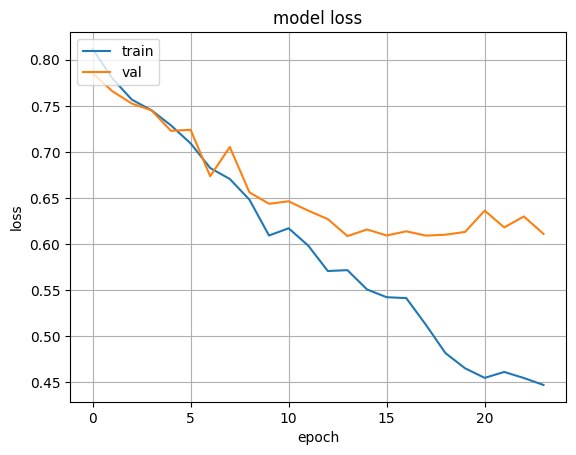

In [35]:
# Validação o erro por épocas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

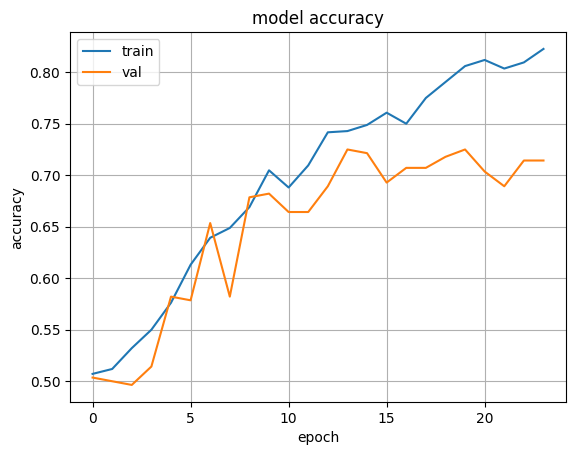

In [36]:
# Validação da acurácia por épocas
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

In [37]:
# armazenando as predições do modelo dos dados de teste em uma variável 
cnn_pred_cat_dog = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [38]:
cnn_pred_cat_dog = np.argmax(cnn_pred_cat_dog,axis=1)

y_true = np.argmax(y_test_tf,axis=1) # armazena o resultado verdadeiro

In [39]:
animal_names = labels
animal_names = list(dict.fromkeys(animal_names))
animal_names = sorted(animal_names)

In [40]:
animal_names

['cachorinho', 'gatinho']

In [41]:
# Matriz de confusão
cnn_cm_cat_dog = metrics.confusion_matrix(y_true, cnn_pred_cat_dog)
# Definindo a acurácia
cnn_accuracy_cat_dog = metrics.accuracy_score(y_true, cnn_pred_cat_dog)

# Print do classification report
print(metrics.classification_report(y_true, cnn_pred_cat_dog, target_names=animal_names))
# Print da acurácia
print("Accuracy score: {}".format(cnn_accuracy_cat_dog))

              precision    recall  f1-score   support

  cachorinho       0.69      0.64      0.67       140
     gatinho       0.67      0.71      0.69       140

    accuracy                           0.68       280
   macro avg       0.68      0.68      0.68       280
weighted avg       0.68      0.68      0.68       280

Accuracy score: 0.6785714285714286


In [47]:
# função para advinhar qual é o animal da foto 

def advinha_animalzinho(filepath):
    image = cv2.imread(filepath)
    img = cv2.resize(image, (image_size, image_size)).astype('float32')/255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    classes = np.argmax(pred, axis=1)
    print(animal_names[classes[0]])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Testando o Modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
gatinho


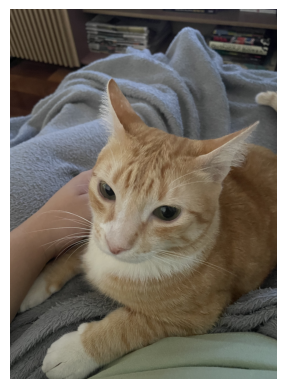

In [53]:
advinha_animalzinho('imagens/teste_animais/Captura de Tela 2024-05-28 às 13.04.43 copiar.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
gatinho


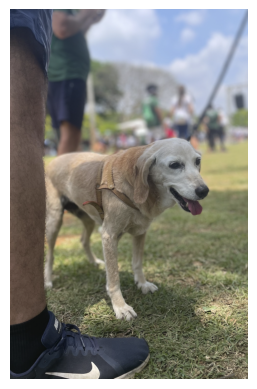

In [54]:
advinha_animalzinho('imagens/teste_animais/Captura de Tela 2024-05-28 às 13.07.39.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
cachorinho


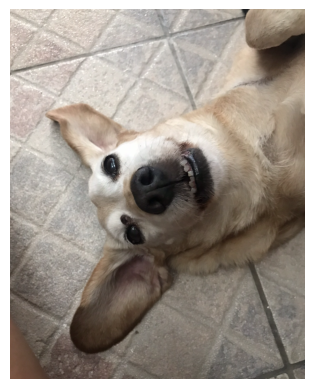

In [55]:
advinha_animalzinho('imagens/teste_animais/Captura de Tela 2024-05-28 às 13.09.10.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
gatinho


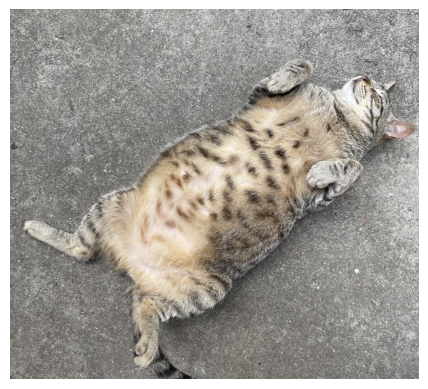

In [56]:
advinha_animalzinho('imagens/teste_animais/Captura de Tela 2024-05-28 às 13.09.54.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
gatinho


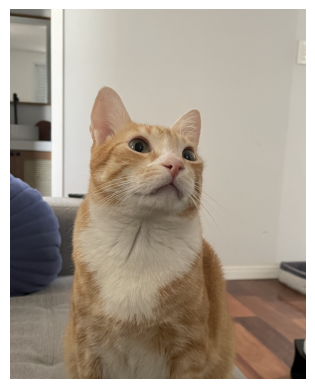

In [57]:
advinha_animalzinho('imagens/teste_animais/Captura de Tela 2024-05-28 às 13.10.50.png')